epoch 0 loss: 3264.04
epoch 50 loss: 28.98686451934694
epoch 100 loss: 28.95375186964436
epoch 150 loss: 28.931168417552254
epoch 200 loss: 28.915766076967017
epoch 250 loss: 28.905261389971667
epoch 300 loss: 28.898096995166828
epoch 350 loss: 28.893210742683344
epoch 400 loss: 28.889878226262518
epoch 450 loss: 28.887605387162893
Final slope and intercept: 9.796828751796577 2.353417616141717


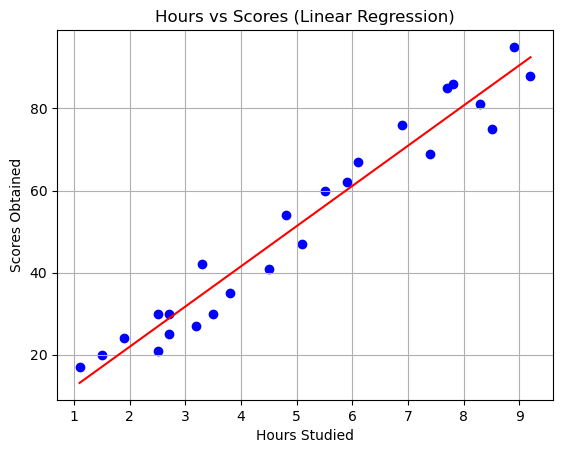

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("student_scores.csv")

# Mean Squared Error Loss Function
def loss(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))

# Gradient Descent Function
def grad(m, b, points, lr):
    m_grad = 0
    b_grad = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        # Partial derivatives of loss w.r.t m and b
        m_grad += (-2 / n) * (y - (m * x + b)) * x
        b_grad += (-2 / n) * (y - (m * x + b))
    # Update m and b using learning rate
    m = m - m_grad * lr
    b = b - b_grad * lr
    return m, b

# Initialize parameters
m, b = 0, 0        # slope and intercept
epochs = 500       # number of iterations
lr = 0.01          # learning rate

# Training loop
for i in range(epochs):
    if i % 50 == 0:  # Print loss every 50 iterations
        print("Epoch", i, "Loss:", loss(m, b, data))
    m, b = grad(m, b, data, lr)

print("Final slope and intercept:", m, b)

# Plotting results
plt.scatter(data.Hours, data.Scores, color="blue", label="Data points")

# Create line based on final m and b
x_min, x_max = data.Hours.min(), data.Hours.max()
x_vals = [x_min, x_max]
y_vals = [m * x + b for x in x_vals]

plt.plot(x_vals, y_vals, color="red", label="Regression line")

plt.title("Hours vs Scores (Linear Regression)")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.legend()
plt.grid(True)
plt.show()
